<a href="https://colab.research.google.com/github/tvml/ml2021/blob/main/codici/ae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
IS_COLAB = ('google.colab' in str(get_ipython()))
if IS_COLAB:
  %tensorflow_version 2.x

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

2.5.0


In [3]:
if IS_COLAB:
  from google.colab import drive
  drive.mount('/gdrive')
  filepath = "/gdrive/My Drive/colab_data/"
else:
  filepath = "../ml_store"

Mounted at /gdrive


In [4]:
def save_model(m,filename):
    model_json = m.to_json()
    with open(filepath+filename+".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    m.save_weights(filepath+filename+".h5")
    print("Saved model to disk")

def load_model_weights(filename, model):
    model.load_weights(filepath+filename+".h5")
    print("Loaded weights from disk")
    return model

def load_model(filename):
    json_file = open(filepath+filename+'.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    m = model_from_json(loaded_model_json)
    # load weights into new model
    m.load_weights(filepath+filename+".h5")
    print("Loaded model from disk")
    return m

In [5]:
# this is the size of our encoded representations
encoding_dim = 32
input_size = 784

In [6]:
ae = Sequential()

# Encoder Layers
ae.add(Dense(encoding_dim, input_shape=(input_size,), activation='relu'))

# Decoder Layers
ae.add(Dense(input_size, activation='sigmoid'))

ae.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [7]:
ae.compile(optimizer='adadelta', loss='binary_crossentropy')

In [8]:
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
#ae = load_model_weights('ae', ae)

Loaded weights from disk


In [10]:
history = ae.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 5ms/step - loss: 0.6933 - val_loss: 0.6933
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6930 - val_loss: 0.6930
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6929 - val_loss: 0.6928
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6927 - val_loss: 0.6927
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6924 - val_loss: 0.6924
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6923 - val_loss: 0.6922
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6921 - val_loss: 0.6921
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6920 - val_loss: 0.6919

In [11]:
save_model(ae,'ae')

Saved model to disk


In [12]:
ae.layers[0].get_weights()[0][780,:]

array([-0.02572836, -0.07252178, -0.0250895 ,  0.06630056, -0.00554927,
        0.07169855, -0.04443166,  0.07626844,  0.08138788,  0.04021027,
        0.03055338,  0.06190006, -0.07823035,  0.0142116 ,  0.08502845,
        0.039675  , -0.03864283,  0.07668964,  0.03742898,  0.05470493,
        0.02018178,  0.03009355, -0.04235524,  0.04464708, -0.08407311,
       -0.03190824, -0.03132397,  0.02435547,  0.06076998,  0.08024503,
        0.07820172, -0.01194108], dtype=float32)

In [13]:
input_img = Input(shape=(input_size,))
encoder_layer1 = ae.layers[0]
encoder = Model(input_img, encoder_layer1(input_img))

encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


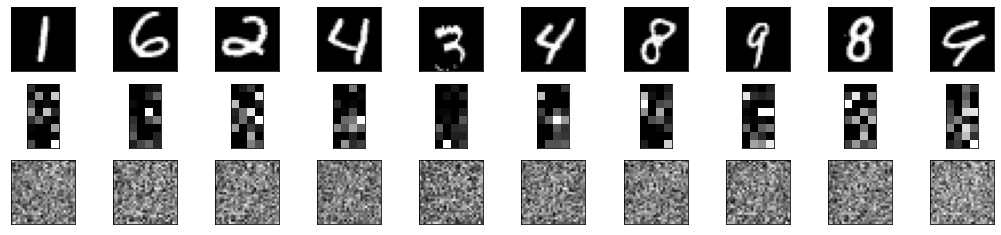

In [14]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = ae.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
ae1 = Sequential()

# Encoder Layers
ae1.add(Dense(encoding_dim, input_shape=(input_size,), activation='relu',
                activity_regularizer=regularizers.l1(10e-6)))

# Decoder Layers
ae1.add(Dense(input_size, activation='sigmoid'))

ae1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [16]:
ae1.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
#ae1 = load_model_weights('ae1', ae1)

Loaded weights from disk


In [17]:
ae1.fit(x_train, x_train,
                epochs=150,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/150
235/235 [==============================] - 2s 5ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 2/150
235/235 [==============================] - 1s 4ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 3/150
235/235 [==============================] - 1s 4ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 4/150
235/235 [==============================] - 1s 4ms/step - loss: 0.6935 - val_loss: 0.6934
Epoch 5/150
235/235 [==============================] - 1s 4ms/step - loss: 0.6933 - val_loss: 0.6932
Epoch 6/150
235/235 [==============================] - 1s 4ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 7/150
235/235 [==============================] - 1s 4ms/step - loss: 0.6929 - val_loss: 0.6928
Epoch 8/150
235/235 [==============================] - 1s 4ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 9/150
235/235 [==============================] - 1s 4ms/step - loss: 0.6925 - val_loss: 0.6924
Epoch 10/150
235/235 [==============================] - 1s 4ms/step - loss: 0.6923 - val_lo

In [18]:
save_model(ae1,'ae1')

Saved model to disk


In [19]:
input_img = Input(shape=(input_size,))
encoder_layer1 = ae1.layers[0]
encoder1 = Model(input_img, encoder_layer1(input_img))

encoder1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


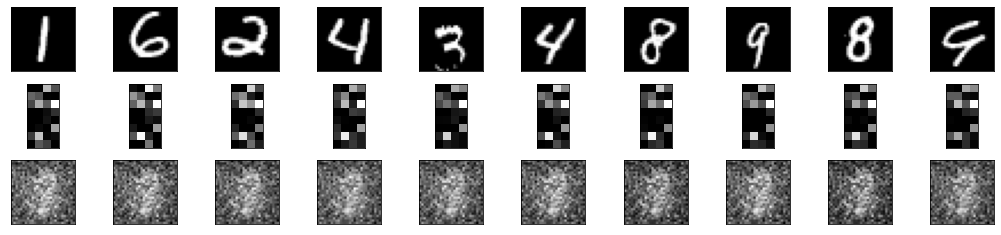

In [20]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder1.predict(x_test)
decoded_imgs = ae1.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
ae2 = Sequential()

# Encoder Layers
ae2.add(Dense(4 * encoding_dim, input_shape=(784,), activation='relu'))
ae2.add(Dense(2 * encoding_dim, activation='relu'))
ae2.add(Dense(encoding_dim, activation='relu'))

# Decoder Layers
ae2.add(Dense(2 * encoding_dim, activation='relu'))
ae2.add(Dense(4 * encoding_dim, activation='relu'))
ae2.add(Dense(784, activation='sigmoid'))

ae2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
________________________________________________

In [22]:
ae2.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
ae2 = load_model_weights('ae2', ae2)

Loaded weights from disk


In [23]:
ae2.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2465 - val_loss: 0.1639
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1479 - val_loss: 0.1357
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1304 - val_loss: 0.1237
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1216 - val_loss: 0.1169
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1148 - val_loss: 0.1101
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1095 - val_loss: 0.1064
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1061 - val_loss: 0.1033
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1035 - val_loss: 0.1015
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1010 - val_loss: 0.0991
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0994 - val_loss: 0.0975

In [24]:
save_model(ae2,'ae2')

Saved model to disk


In [25]:
input_img = Input(shape=(input_size,))
encoder_layer1 = ae2.layers[0]
encoder_layer2 = ae2.layers[1]
encoder_layer3 = ae2.layers[2]
encoder2 = Model(input_img, encoder_layer3(encoder_layer2(encoder_layer1(input_img))))

encoder2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


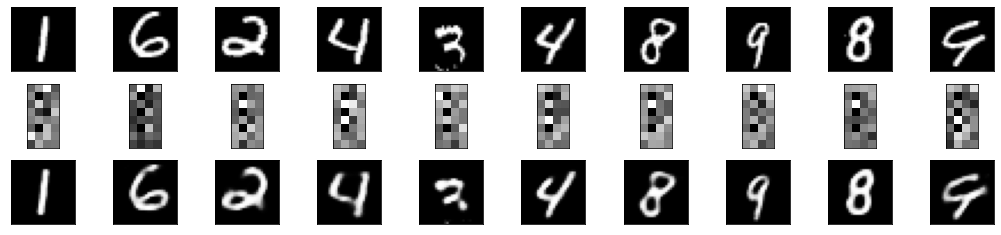

In [26]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder2.predict(x_test)
decoded_imgs = ae2.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [27]:
x_train_r = x_train.reshape((len(x_train), 28, 28, 1))
x_test_r = x_test.reshape((len(x_test), 28, 28, 1))

In [28]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=x_train_r.shape[1:]))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same'))

# Flatten encoding for visualization
autoencoder.add(Flatten())
autoencoder.add(Reshape((4, 4, 8)))

# Decoder Layers
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 8)          

In [30]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('flatten').output)
encoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
flatten (Flatten)            (None, 128)               0   

In [31]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [32]:
autoencoder = load_model_weights('ae3',autoencoder)

OSError: ignored

In [33]:
autoencoder.fit(x_train_r, x_train_r,
                epochs=10,
                batch_size=128,
                validation_data=(x_test_r, x_test_r))

Epoch 1/10
469/469 [==============================] - 32s 11ms/step - loss: 0.1995 - val_loss: 0.1353
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1263 - val_loss: 0.1167
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1131 - val_loss: 0.1079
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1068 - val_loss: 0.1035
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1031 - val_loss: 0.1004
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1004 - val_loss: 0.0981
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0983 - val_loss: 0.0965
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0964 - val_loss: 0.0943
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0948 - val_loss: 0.0929
Epoch 10/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0934 - val_l

In [34]:
save_model(autoencoder, 'ae3')

Saved model to disk


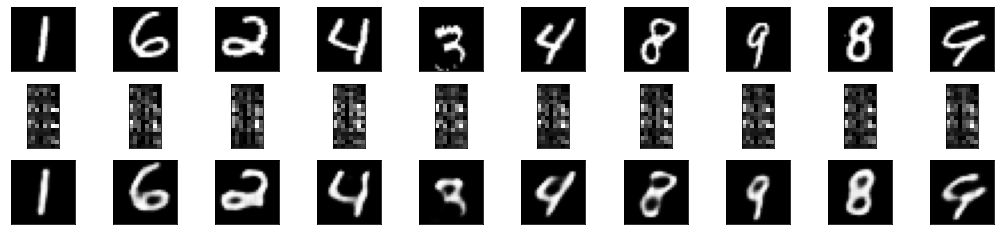

In [35]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

encoded_imgs = encoder.predict(x_test_r)
decoded_imgs = autoencoder.predict(x_test_r)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow(encoded_imgs[image_idx].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow(decoded_imgs[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()